In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, state_union, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag, map_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Example text
text = """Barack Obama was born in Hawaii. He was the 44th President of the United States.
           He served two terms in office from 2009 to 2017."""


In [ ]:
# Sentence segmentation
sentences = sent_tokenize(text)

In [ ]:
# POS tagging
tokens = [word_tokenize(sentence) for sentence in sentences]
pos_tags = [pos_tag(token) for token in tokens]

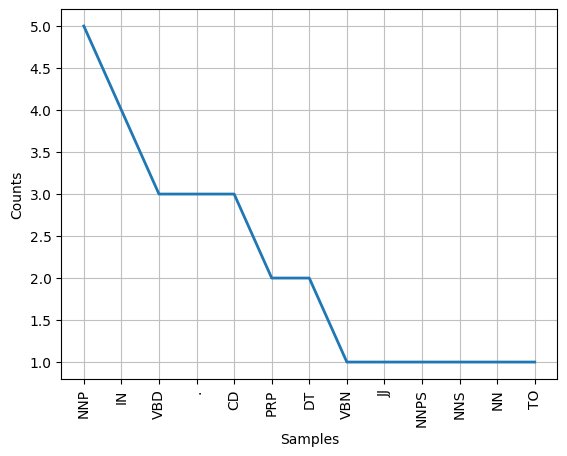

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Visualization of POS
pos_list = [tag[1] for sentence in pos_tags for tag in sentence]
pos_counts = nltk.FreqDist(pos_list)
pos_counts.plot()

In [ ]:
# Named Entity Recognition
ner_tags = [ne_chunk(pos_tag(token)) for token in tokens]

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in sentence] for sentence in tokens]

In [ ]:
# Stopwords removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [[token for token in sentence if not token.lower() in stop_words] for sentence in lemmatized_tokens]


In [ ]:
# Output
print("Sentences: ", sentences)
print("\nPOS tags: ", pos_tags)
print("\nNamed Entity Recognition: ", ner_tags)
print("\nFiltered Tokens: ", filtered_tokens)

Sentences:  ['Barack Obama was born in Hawaii.', 'He was the 44th President of the United States.', 'He served two terms in office from 2009 to 2017.']

POS tags:  [[('Barack', 'NNP'), ('Obama', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), ('Hawaii', 'NNP'), ('.', '.')], [('He', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('44th', 'JJ'), ('President', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('United', 'NNP'), ('States', 'NNPS'), ('.', '.')], [('He', 'PRP'), ('served', 'VBD'), ('two', 'CD'), ('terms', 'NNS'), ('in', 'IN'), ('office', 'NN'), ('from', 'IN'), ('2009', 'CD'), ('to', 'TO'), ('2017', 'CD'), ('.', '.')]]

Named Entity Recognition:  [Tree('S', [Tree('PERSON', [('Barack', 'NNP')]), Tree('PERSON', [('Obama', 'NNP')]), ('was', 'VBD'), ('born', 'VBN'), ('in', 'IN'), Tree('GPE', [('Hawaii', 'NNP')]), ('.', '.')]), Tree('S', [('He', 'PRP'), ('was', 'VBD'), ('the', 'DT'), ('44th', 'JJ'), ('President', 'NNP'), ('of', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'N